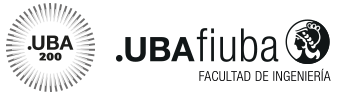

# <center> ANÁLISIS NUMÉRICO I - MODELACIÓN NUMÉRICA
    
# <center> Ecuaciones no Lineales - Tercera Parte
    
# <center> Método de refinamiento: Steffensen

***

**Curso Schwarz - Sosa - Castaño**
- 75.12/95.04 Análisis Numérico I. *Curso 4*.
- CB051 Modelación Numérica. *Curso 4*.

# <center> CASO A ANALIZAR
___

Hallar $p$ tal que $f(p)=0,$ $p  \in [10,150]$ siendo :
$$f(x)=\frac{9,80665\cdot 12^2}{2\cdot \pi}\cdot \tanh\left(\frac{2\cdot \pi\cdot 14}{x}\right)-x$$

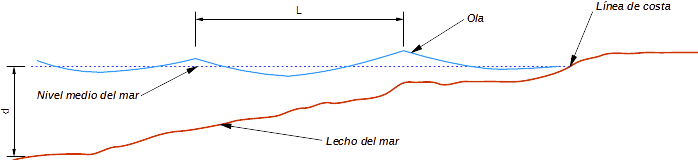

A partir de los métodos de las <b>Aproximaciones Sucesivas</b> o del <b>Punto Fijo</b> y del $\Delta^2$ de Aitken, podemos obtener el **Método de Steffensen**:

$$ x_{j+1}=x_j-\frac{(f(x_j))^2}{f(x_j+f(x_j))-f(x_j)}$$

___

### Búsqueda de raíces en ecuaciones no lineales
___

Problema a resolver: hallar $p$ tal que $f(p)=0,$ $p  \in [a,b].$



In [1]:
import numpy as np #librería para operaciones algebraicas y numéricas
import pandas as pd #librería para manejo de datos

#programo el método Steffensen
def steff(x0, tol, itmax = 100): 
        #np.seterr('raise')
        df2 = pd.DataFrame(columns=('xcero','xuno'))
        x0 = x0
        contador = 0  
        x1 = x0-(f(x0))**2/(f(x0+f(x0))-f(x0))
        while (contador < itmax) and (abs((x1-x0)/x1) > tol):
            df2.loc[contador] = [x0,x1]
            x0 = x1                                                 
            x1 = x0-(f(x0))**2/(f(x0+f(x0))-f(x0))
            contador += 1  
        er=abs((x1-x0)/x1)
        print('El \033[1mMétodo de Steffensen \033[0mconvergió en',contador,'iteraciones, el resultado es:',np.round(x1,6),'m y el error relativo es',np.format_float_scientific(er,precision=6),'. El valor de la función resulta',np.format_float_scientific(f(x1),precision=6),'m.')
        return df2

Aplicamos el método de **Steffensen** con un valor inicial $x_0=10$ m.

In [2]:
#Definición del valor inicial y la Tolerancia

def f(x):#definimos la función con la que vamos a trabajar
    return (9.80665*12**2)/(2*np.pi)*np.tanh((2*np.pi*14/x))-x   #deben cambiar la función si quieren probar otra 

tolerancia=10**(-8)

ejemplo=steff(10, tolerancia)


El Método de Steffensen convergió en 4 iteraciones, el resultado es: 131.395838 m y el error relativo es 2.379366e-15 . El valor de la función resulta 0.e+00 m.


In [3]:
from IPython.display import display, Math
import sympy.printing as printing

xcero = ejemplo.xcero
xuno = ejemplo.xuno

print ("Analicemos todas las iteraciones. \n")  

for p in range (4):
    print ("\033[1mIteración \033[0m"+str(p+1)+": ")
    ec = "x_"+str(p)+"= "+str(xcero[p])+"\;y\; x_"+str(p+1)+"=x_"+str(p)+"-\\frac{(f(x_"+str(p)+"))^2}{f(x_"+str(p)+"+f(x_"+str(p)+"))-f(x_"+str(p)+")}"+"= "+str(xuno[p])
    display(Math(printing.latex(ec,mul_symbol='dot')))

Analicemos todas las iteraciones. 

Iteración 1: 


<IPython.core.display.Math object>

Iteración 2: 


<IPython.core.display.Math object>

Iteración 3: 


<IPython.core.display.Math object>

Iteración 4: 


<IPython.core.display.Math object>

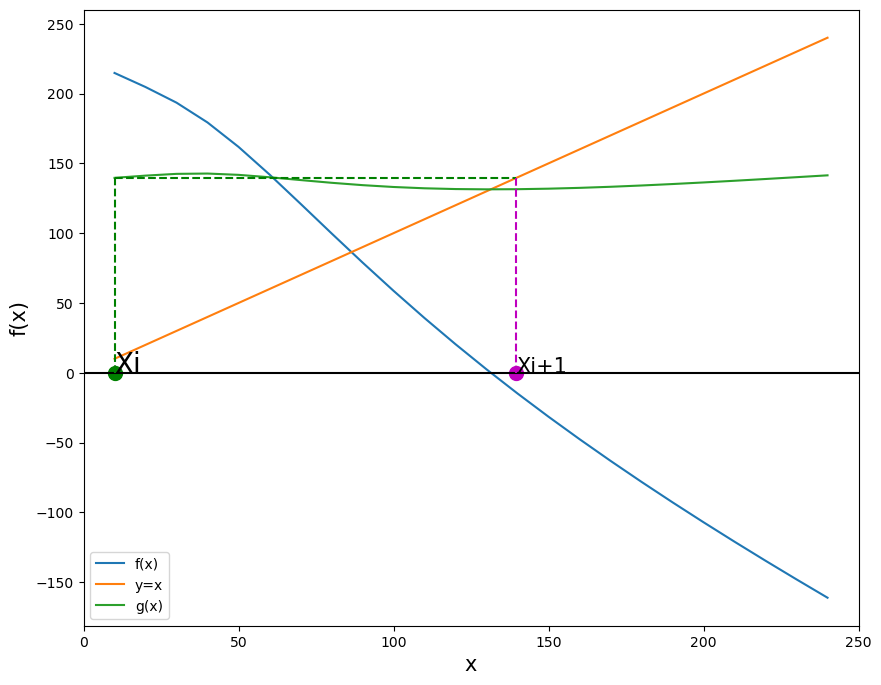

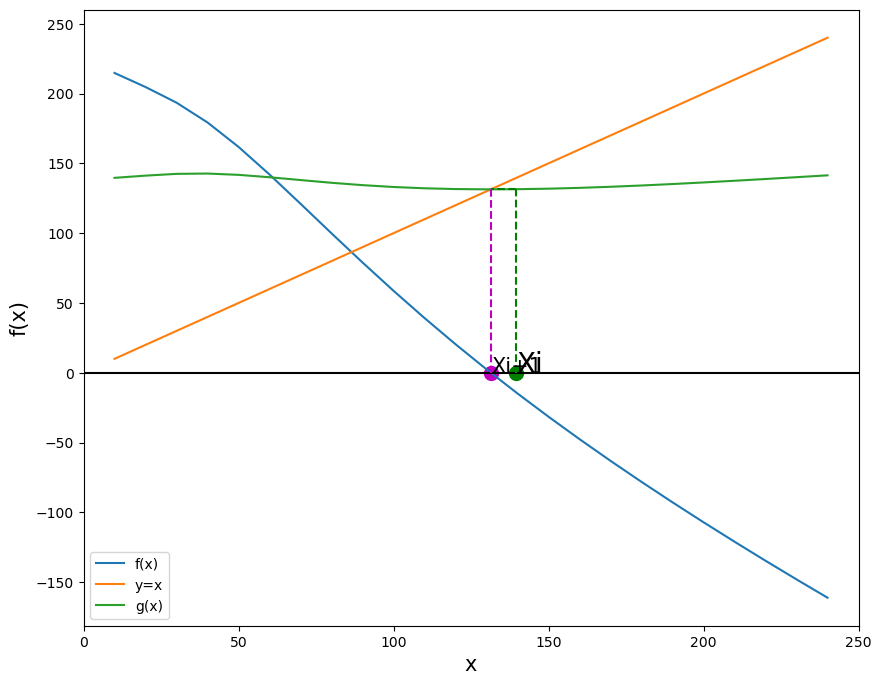

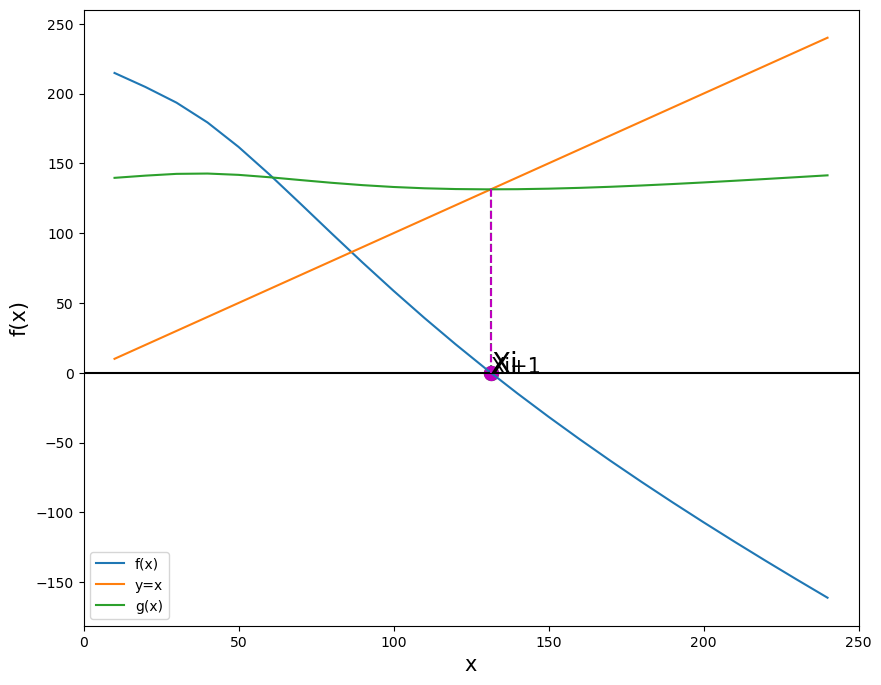

In [4]:
import matplotlib.pyplot as plt
ejex = np.arange(10, 250, 10);
y = f(ejex)

def i(x):#definimos la función =x
    return x

def g(x):
    return x-(f(x))**2/(f(x+f(x))-f(x))

for p in range (3):
    fig = plt.figure(figsize=(10,8))
    plt.plot(ejex, y)
    plt.xlabel('x',fontsize=15)
    plt.xlim(0,250)
    plt.ylabel('f(x)',fontsize=15)
    plt.plot(ejex, i(ejex))
    plt.plot(ejex, g(ejex))
    plt.axhline(y=0, color='k')   
    plt.scatter(x=xcero[p], y=0, marker="o", c='green', s=100)
    plt.annotate("Xi", (xcero[p], 0),fontsize=20)
    plt.plot([xcero[p],xcero[p]], [0,xuno[p]], color='g',linestyle='dashed')
    plt.plot([xcero[p],xuno[p]], [xuno[p],xuno[p]], color='g',linestyle='dashed')
    plt.scatter(x=xuno[p], y=0, marker="o", c='m', s=100)
    plt.annotate("Xi+1", (xuno[p], 0),fontsize=15)
    plt.legend(['f(x)','y=x','g(x)'],fontsize=10)
    plt.plot([xuno[p],xuno[p]], [xuno[p],0], color='m',linestyle='dashed')
    

In [5]:
print('Resumen de resultados para Steffensen:')
print('A continuación se muestran todas las iteraciones:')
ejemplo.columns= ['Xi','Xi+1']
ejemplo.head(5)

Resumen de resultados para Steffensen:
A continuación se muestran todas las iteraciones:


,Xi,Xi+1
0,10.000000,139.629149
1,139.629149,131.493512
2,131.493512,131.395852
3,131.395852,131.395838


La rapidez de la convergencia nos muestra la eficacia del <b>Método de Steffensen</b>. En este caso, es más rápido que el <b>Método de Newton-Raphson</b>.

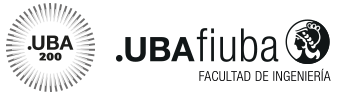



# <center> GRACIAS POR SU ATENCIÓN

## <center> ¿PREGUNTAS?

### Ecuaciones no Lineales - Tercera Parte

***

**Curso Schwarz - Sosa - Castaño**
- 75.12/95.04 Análisis Numérico I. *Curso 4*.
- CB051 Modelación Numérica. *Curso 4*.